<a href="https://colab.research.google.com/github/Harkeerat-Pathak/California-Housing-Dataset/blob/main/California_Housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 Importing necessary libraries

Reading the dataset (California Housing Prices)


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
# If the file is saved locally then by using the following commands we can browse the file


from google.colab import files
uploaded = files.upload()

Saving california_housing.csv to california_housing.csv


In [ ]:
california_housing_dataframe=pd.read_csv("california_housing.csv")
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. 

2. A blockgroup typically has a population of 600 to 3,000 people.

3. We will just call them “districts” for short.

In [ ]:
 #the shape of the data

california_housing_dataframe.shape

(20640, 10)

In [ ]:
# Description of the datatypes

california_housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Notice that there are 20,640 instances (entries) in the whole dataset. Also notice that the total_bedrooms attribute has only 20,433 non-null values which means that 207 districts don't have this feature. You can also see that ocean_proximity is not numerical and probably a categorical attribute. 

In [ ]:
# Statistical Information of the dataset

california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


I hope the count, mean, min and max rows are self explanatory for you. Be aware of the fact, that all null values are ignored here (count of total_bedrooms is 20,433 not 20,640). The std row shows you the standard deviation, which quantifies the amount of variation between the values. The 25%, 50%, 75% are the percentiles. For an example 75% of the districts have housing_median_age of lower than 37 while 50% are lower than 29 and 25% are lower than 18. These are often called the 25th percentile (or 1st quartile), the median and the 75th percentile (or 3rd quartile).

Data Visualization

1. Histogram

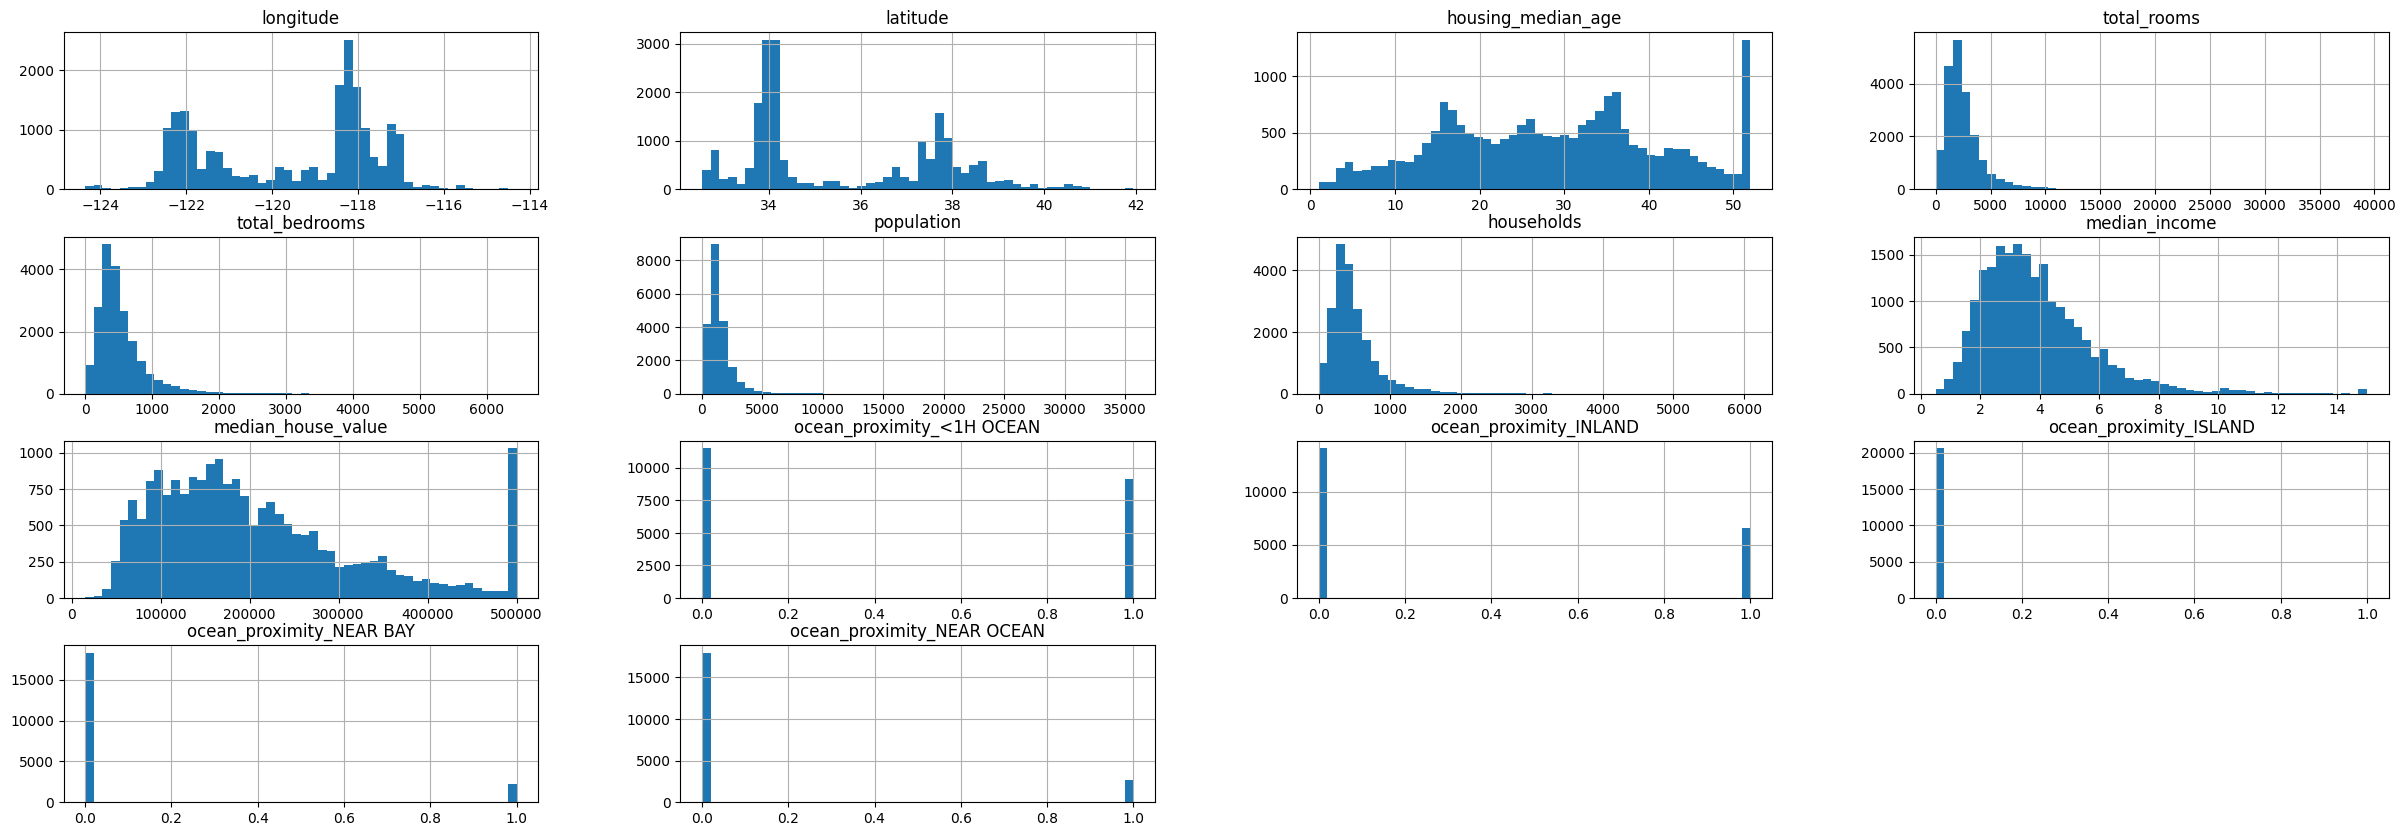

In [ ]:
california_housing_dataframe.hist(bins=50, figsize=(30,10))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

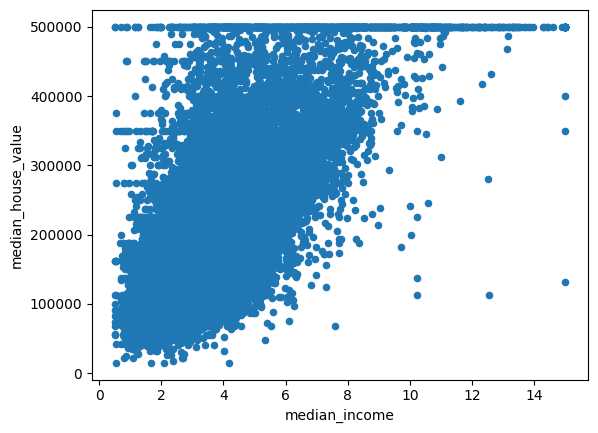

In [ ]:
california_housing_dataframe.plot(kind='scatter',x='median_income',y='median_house_value')

<ipython-input-9-a8a733a6c7aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  california_housing_dataframe_correlation = california_housing_dataframe.corr()


<Axes: >

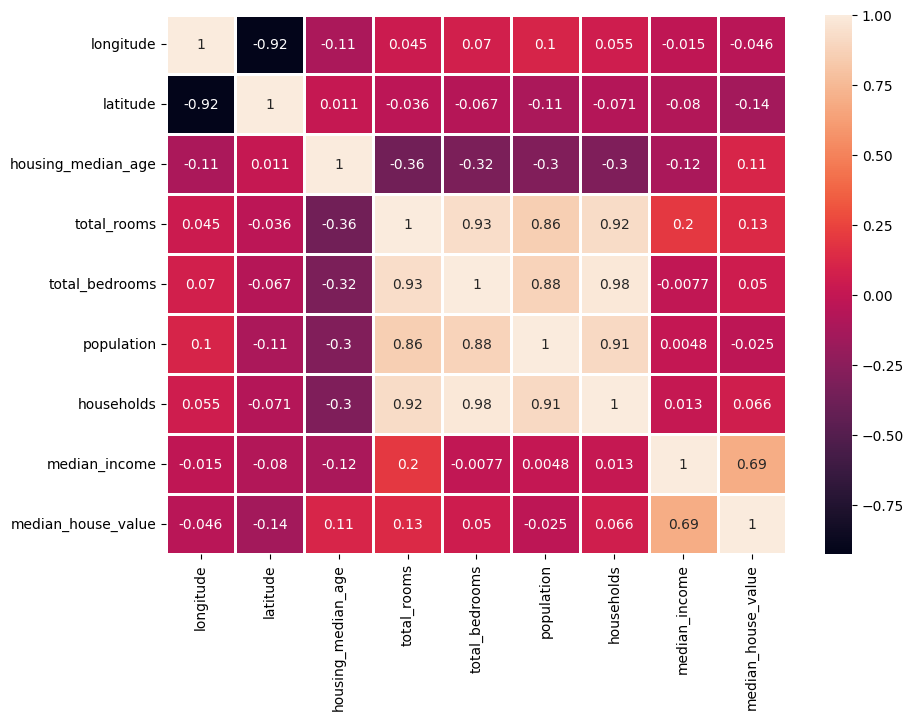

In [ ]:
# Showing the correlation between data
california_housing_dataframe_correlation = california_housing_dataframe.corr()


# housing dataset correlation in heat map

fig,ax=plt.subplots(figsize=(10,7))
sns.heatmap(california_housing_dataframe_correlation, annot = True,linewidth=.8,ax=ax)

In [ ]:
#corr_matrix=california_housing_dataframe_correlation

california_housing_dataframe_correlation["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Feature Engineering

In [ ]:
# creating new features

california_housing_dataframe['bedroom_per_room']=california_housing_dataframe['total_bedrooms']/california_housing_dataframe['total_rooms']
california_housing_dataframe['population_per_household']=california_housing_dataframe['population']/california_housing_dataframe['households']
california_housing_dataframe['rooms_per_household']=california_housing_dataframe['total_rooms']/california_housing_dataframe['households']

In [ ]:
california_housing_dataframe_correlation["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Data Cleaning

1. Removing missing values

In [ ]:
# MIssing values

california_housing_dataframe.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
bedroom_per_room            207
population_per_household      0
rooms_per_household           0
dtype: int64

In [ ]:
# Replacing missing values with median

california_housing_dataframe.fillna(california_housing_dataframe.median(),inplace=True)
california_housing_dataframe.isnull().sum()

<ipython-input-14-ba49787ea7a6>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  california_housing_dataframe.fillna(california_housing_dataframe.median(),inplace=True)


longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
bedroom_per_room            0
population_per_household    0
rooms_per_household         0
dtype: int64

In [ ]:
# Checking categorical values

california_housing_dataframe['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# Converting categorical value into numerical  value using one-hot encoding method

california_housing_dataframe=pd.get_dummies(california_housing_dataframe,columns=['ocean_proximity'])

# Showing the first 5 records after conversion

california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_per_room,population_per_household,rooms_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.146591,2.555556,6.984127,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.155797,2.109842,6.238137,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.129516,2.802260,8.288136,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.184458,2.547945,5.817352,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.172096,2.181467,6.281853,0,0,0,1,0


Splitting the dataset(Train test Split)

In [ ]:
train_set, test_set = train_test_split(california_housing_dataframe, test_size=0.2, random_state=42)
print(len(train_set), "Train Instances +", len(test_set), "Test Instances")

16512 Train Instances + 4128 Test Instances


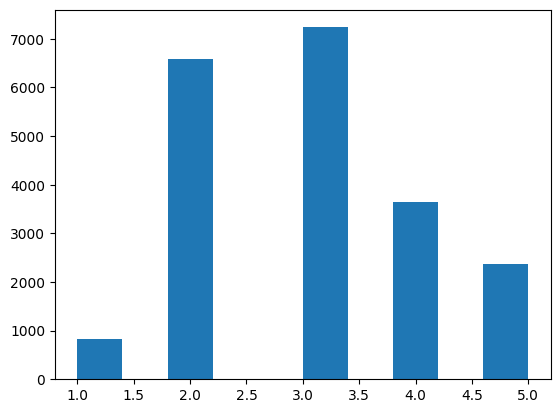

In [ ]:
plt.hist(california_housing_dataframe["income_categories"])
fig = plt.gcf()

In [ ]:
# Stratified sampling techinque for splitting

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(california_housing_dataframe, california_housing_dataframe["income_categories"]):
    strat_train_set = california_housing_dataframe.loc[train_index]
    strat_test_set = california_housing_dataframe.loc[test_index]

In [ ]:
def income_categories_proportions(data):
    return data["income_categories"].value_counts() / len(data)

train_set, test_set = train_test_split(california_housing_dataframe, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_categories_proportions(california_housing_dataframe),
    "Stratified": income_categories_proportions(strat_test_set),
    "Random": income_categories_proportions(test_set),
}).sort_index()

In [ ]:


compare_props



,Overall,Stratified,Random
1.0,0.039826,0.039971,0.040213
2.0,0.318847,0.318798,0.324370
3.0,0.350581,0.350533,0.358527
4.0,0.176308,0.176357,0.167393
5.0,0.114438,0.114341,0.109496
